**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../Datasets/IoT-23_train_smote.csv")
display(df_train)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.014679,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.014679,-0.044214,-0.756566,-0.184151,-0.046843,-0.778440,-0.777869,-0.778499,-1.303156,-0.563255,-0.589983,-0.184780,-0.040003,-0.499835,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,0.712756,0.273386,-0.002815,0.505192,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,0.700756,0.258094,-0.014705,0.494734,-0.371757,-0.016764,-0.166467,-1.229442,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210402,-0.211092,-0.207410,-0.057970,0.567019,0.279126,0.022051,0.428915,-0.303942,-0.801662,-0.708314,-0.725170,-0.653861,udp_flood,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,-0.405701,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.405701,-0.044214,-0.756566,-0.184151,-0.046843,-0.778416,-0.777869,-0.778487,-1.303156,-0.563255,-0.589983,-0.184780,-0.04

In [4]:
df_test = pd.read_csv("../Datasets/dataset_andpre/EdgeIIot_test.csv")
display(df_test)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.540587,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540587,-0.302948,0.113379,-0.184151,-0.046843,1.467120,1.469549,1.468985,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0.053936,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,-0.412900,-0.545421,-0.528133,-0.513173,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,-0.430596,-0.566738,-0.540613,-0.530154,-0.371757,-0.016764,-0.166467,0.638795,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210396,-0.211087,-0.207405,-0.05797,-0.477199,-0.536505,-0.510501,-0.528202,-0.303942,1.264714,-0.708314,1.400702,-0.653861,http_flood,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,-0.540588,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540588,-0.302948,0.113379,-0.184151,-0.046843,1.552666,1.555165,1.554603,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train.groupby('type')['type'].count()

type
arp_spoofing            1024
http_botnet                7
http_flood             78528
http_flood_node_red    53770
icmp_flood             24000
mqtt_flood             76917
normal                  9058
port_scanning           4523
tcp_flood              21235
udp_flood              89090
Name: type, dtype: int64

In [6]:
x_columns = df_train.columns.drop('type')

le = LabelEncoder()
le.fit(df_train["type"].values)

x = df_train[x_columns].values
y = df_train["type"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('type')

le = LabelEncoder()
le.fit(df_test["type"].values)

x_val = df_test[x_columns].values
y_val = df_test["type"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((89538, 158), (89538,))

In [10]:
x_train.shape,y_train.shape

((268614, 158), (268614,))

In [11]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('best_model_multiclass_smote.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=512, callbacks=[monitor, checkpoint])

Train on 268614 samples, validate on 89538 samples
Epoch 1/300
268614/268614 [==============================] - 2s 8us/sample - loss: 1.3865 - accuracy: 0.5620 - val_loss: 0.5580 - val_accuracy: 0.7874
Epoch 2/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.7328 - accuracy: 0.7346 - val_loss: 0.4526 - val_accuracy: 0.8043
Epoch 3/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.6063 - accuracy: 0.7683 - val_loss: 0.4177 - val_accuracy: 0.8221
Epoch 4/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.5476 - accuracy: 0.7835 - val_loss: 0.3920 - val_accuracy: 0.8241
Epoch 5/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.5117 - accuracy: 0.7936 - val_loss: 0.3795 - val_accuracy: 0.8272
Epoch 6/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.4874 - accuracy: 0.8007 - val_loss: 0.3676 - val_accuracy: 0.8276
Epoch 7/300
268614/268614 [================

268614/268614 [==============================] - 2s 6us/sample - loss: 0.3436 - accuracy: 0.8315 - val_loss: 0.3163 - val_accuracy: 0.8419
Epoch 55/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3437 - accuracy: 0.8316 - val_loss: 0.3151 - val_accuracy: 0.8421
Epoch 56/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3423 - accuracy: 0.8320 - val_loss: 0.3168 - val_accuracy: 0.8422
Epoch 57/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3423 - accuracy: 0.8314 - val_loss: 0.3157 - val_accuracy: 0.8418
Epoch 58/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3424 - accuracy: 0.8316 - val_loss: 0.3159 - val_accuracy: 0.8420
Epoch 59/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3409 - accuracy: 0.8332 - val_loss: 0.3160 - val_accuracy: 0.8420
Epoch 60/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3410 - accuracy

Epoch 108/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3296 - accuracy: 0.8362 - val_loss: 0.3094 - val_accuracy: 0.8450
Epoch 109/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3300 - accuracy: 0.8353 - val_loss: 0.3084 - val_accuracy: 0.8450
Epoch 110/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3286 - accuracy: 0.8370 - val_loss: 0.3089 - val_accuracy: 0.8449
Epoch 111/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3293 - accuracy: 0.8356 - val_loss: 0.3094 - val_accuracy: 0.8449
Epoch 112/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3288 - accuracy: 0.8368 - val_loss: 0.3094 - val_accuracy: 0.8448
Epoch 113/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3295 - accuracy: 0.8363 - val_loss: 0.3086 - val_accuracy: 0.8449
Epoch 114/300
268614/268614 [==============================] - 1s 6us/sample - los

268614/268614 [==============================] - 1s 6us/sample - loss: 0.3232 - accuracy: 0.8391 - val_loss: 0.3051 - val_accuracy: 0.8452
Epoch 162/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3240 - accuracy: 0.8392 - val_loss: 0.3043 - val_accuracy: 0.8454
Epoch 163/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3235 - accuracy: 0.8388 - val_loss: 0.3051 - val_accuracy: 0.8451
Epoch 164/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3232 - accuracy: 0.8396 - val_loss: 0.3036 - val_accuracy: 0.8455
Epoch 165/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3231 - accuracy: 0.8396 - val_loss: 0.3044 - val_accuracy: 0.8455
Epoch 166/300
268614/268614 [==============================] - 2s 6us/sample - loss: 0.3233 - accuracy: 0.8397 - val_loss: 0.3042 - val_accuracy: 0.8452
Epoch 167/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3232 - ac

268614/268614 [==============================] - 1s 5us/sample - loss: 0.3211 - accuracy: 0.8408 - val_loss: 0.3033 - val_accuracy: 0.8453
Epoch 215/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3212 - accuracy: 0.8410 - val_loss: 0.3038 - val_accuracy: 0.8453
Epoch 216/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3209 - accuracy: 0.8406 - val_loss: 0.3027 - val_accuracy: 0.8456
Epoch 217/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3203 - accuracy: 0.8409 - val_loss: 0.3027 - val_accuracy: 0.8451
Epoch 218/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3209 - accuracy: 0.8407 - val_loss: 0.3028 - val_accuracy: 0.8451
Epoch 219/300
268614/268614 [==============================] - 1s 6us/sample - loss: 0.3208 - accuracy: 0.8405 - val_loss: 0.3024 - val_accuracy: 0.8454
Epoch 220/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3205 - ac

268614/268614 [==============================] - 1s 5us/sample - loss: 0.3190 - accuracy: 0.8416 - val_loss: 0.3013 - val_accuracy: 0.8470
Epoch 267/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3187 - accuracy: 0.8419 - val_loss: 0.3017 - val_accuracy: 0.8452
Epoch 268/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3186 - accuracy: 0.8416 - val_loss: 0.3018 - val_accuracy: 0.8452
Epoch 269/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3182 - accuracy: 0.8421 - val_loss: 0.3012 - val_accuracy: 0.8462
Epoch 270/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3184 - accuracy: 0.8421 - val_loss: 0.3018 - val_accuracy: 0.8453
Epoch 271/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3178 - accuracy: 0.8418 - val_loss: 0.3013 - val_accuracy: 0.8461
Epoch 272/300
268614/268614 [==============================] - 1s 5us/sample - loss: 0.3182 - ac

In [12]:
# Load the best-saved model
best_model = load_model('best_model_multiclass_normal.h5')

# Evaluate the best-saved model
y_pred = best_model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_val, y_pred_classes)
print('')
print('Test accuracy:', acc)


Test accuracy: 0.8461882105921508


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               81408     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

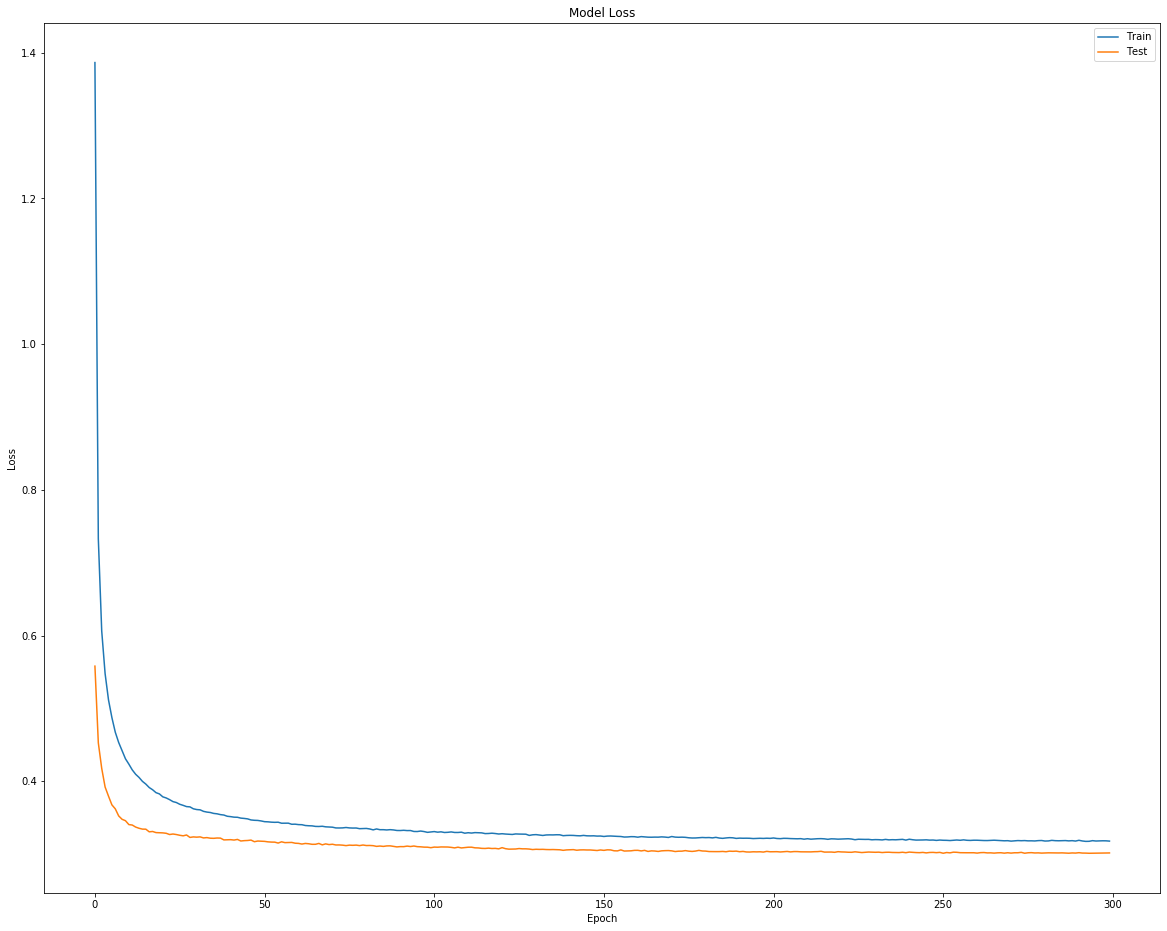

In [14]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
pred = model.predict(x_val)

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [17]:
pred_labels = np.argmax(pred, axis=1)

calculate_metrics("Neural Network", y_val, pred_labels, average='weighted')

--- Performance of Neural Network ---
Accuracy : 84.41%
Precision: 87.32%
Recall: 84.41%
F1-score: 81.89%
Balanced accuracy: 61.08%
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00         1
           2       0.70      1.00      0.82     19782
           3       0.99      0.37      0.54     13428
           4       1.00      1.00      1.00      6029
           5       0.83      0.99      0.90     19130
           6       0.81      0.61      0.70      2310
           7       0.54      0.90      0.68      1117
           8       0.86      0.24      0.38      5282
           9       1.00      1.00      1.00     22209

    accuracy                           0.84     89538
   macro avg       0.67      0.61      0.60     89538
weighted avg       0.87      0.84      0.82     89538



/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_clas

-------------------------------------

**Result Plots**

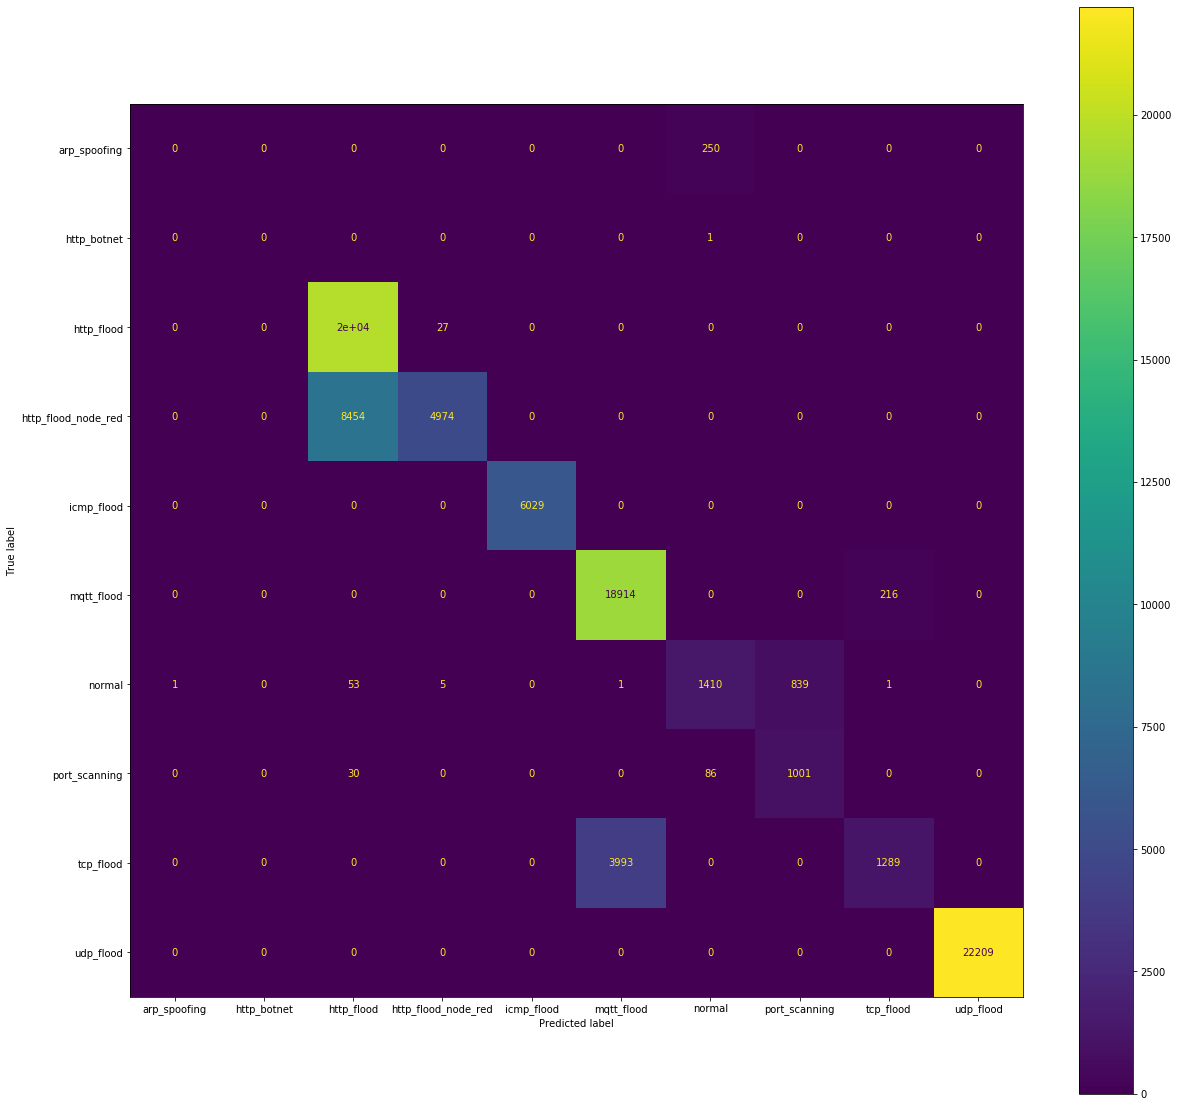

In [18]:
original_labels_list = le.classes_

# Compute confusion matrix
pred_labels = np.argmax(pred, axis=1)
cm = confusion_matrix(y_val, pred_labels)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= original_labels_list)
fig, ax = plt.subplots(figsize=(20, 20))
cmd.plot(ax=ax)

In [19]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

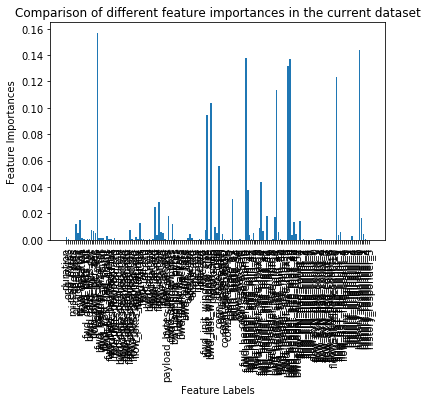

In [20]:
# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

## 